In [14]:
from keras.preprocessing.image import load_img
import numpy as np

In [15]:
img1 = load_img(r"C:\Users\USER\v_data\test\cars\1.jpg")
img2 = load_img(r"C:\Users\USER\v_data\test\planes\1.jpg",target_size=(2000,2000))

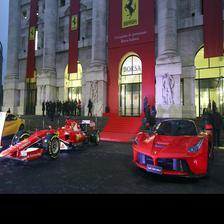

In [16]:
img1

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [18]:
img_width = 224
img_height = 224
train_data = r"C:\Users\USER\v_data\train"
test_data = r"C:\Users\USER\v_data\test"
train_samples = 400
test_samples = 100
input_shape = (img_width, img_height,3)

In [19]:
#model define
model = Sequential()
model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 activation_5 (Activation)   (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_6 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                 

In [21]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])

In [22]:
train_data = ImageDataGenerator(rescale=1. /255)
test_data = ImageDataGenerator(rescale=1. /255)
train_data_load = train_data.flow_from_directory(
                    r'C:\Users\USER\v_data\train',
                    target_size=(img_width,img_height),
                    batch_size=20,
                    class_mode='binary')
test_data_load = test_data.flow_from_directory(
                    r'C:\Users\USER\v_data\test',
                    target_size=(img_width,img_height),
                    batch_size=20,
                    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model.fit_generator(
        train_data_load,
        epochs=15,
        validation_data=test_data_load,)

In [ ]:
img2 = load_img(r"C:\Users\USER\v_data\test\planes\5.jpg",target_size=(224,224))
img2

In [ ]:
i = np.array(img2)
i

In [ ]:
i = i/255
i

In [ ]:
i.shape

In [ ]:
i = i.reshape(1,224,224,3)

In [ ]:
i

In [ ]:
model.predict(i)